In [56]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("truel.csv")

In [25]:
df

,p1_p2_dist,p1_p3_dist,p2_p3_dist,p1_acc,p2_acc,p3_acc,p1_target,p2_target,p3_target,p1_survive,p2_survive,p3_survive
0,0.600278,0.517168,0.123237,0.987987,0.887565,0.353948,2,1,1,0.097,0.093,0.703
1,0.600278,0.517168,0.123237,0.987987,0.887565,0.353948,2,1,2,0.201,0.038,0.679
2,0.600278,0.517168,0.123237,0.987987,0.887565,0.353948,2,3,1,0.578,0.090,0.000
3,0.600278,0.517168,0.123237,0.987987,0.887565,0.353948,2,3,2,0.910,0.019,0.000
4,0.600278,0.517168,0.123237,0.987987,0.887565,0.353948,3,1,1,0.057,0.806,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.291011,0.674168,0.526214,0.601967,0.195244,0.111059,2,3,2,0.935,0.015,0.419
7996,0.291011,0.674168,0.526214,0.601967,0.195244,0.111059,3,1,1,0.394,0.641,0.242
7997,0.291011,0.674168,0.526214,0.601967,0.195244,0.111059,3,1,2,0.522,0.476,0.226
7998,0.291011,0.674168,0.526214,0.601967,0.195244,0.111059,3,3,1,0.690,0.394,0.041


In [26]:
equilibria = df.sort_values(["p1_p2_dist", "p1_p3_dist", "p2_p3_dist", "p1_acc", "p2_acc", "p3_acc"])
equilibria = equilibria.groupby(["p1_p2_dist", "p1_p3_dist", "p2_p3_dist", "p1_acc", "p2_acc", "p3_acc"])

In [27]:
equilibria.head(8)

,p1_p2_dist,p1_p3_dist,p2_p3_dist,p1_acc,p2_acc,p3_acc,p1_target,p2_target,p3_target,p1_survive,p2_survive,p3_survive
4208,0.021901,0.443700,0.436485,0.832775,0.671416,0.531879,2,1,1,0.026,0.000,0.968
4209,0.021901,0.443700,0.436485,0.832775,0.671416,0.531879,2,1,2,0.026,0.000,0.959
4210,0.021901,0.443700,0.436485,0.832775,0.671416,0.531879,2,3,1,0.395,0.000,0.228
4211,0.021901,0.443700,0.436485,0.832775,0.671416,0.531879,2,3,2,0.817,0.000,0.071
4212,0.021901,0.443700,0.436485,0.832775,0.671416,0.531879,3,1,1,0.003,0.888,0.061
...,...,...,...,...,...,...,...,...,...,...,...,...
6107,1.124407,0.751278,0.760987,0.726002,0.713553,0.147992,2,3,2,0.860,0.427,0.130
6108,1.124407,0.751278,0.760987,0.726002,0.713553,0.147992,3,1,1,0.429,0.858,0.133
6109,1.124407,0.751278,0.760987,0.726002,0.713553,0.147992,3,1,2,0.564,0.735,0.113
6110,1.124407,0.751278,0.760987,0.726002,0.713553,0.147992,3,3,1,0.702,0.818,0.017


In [37]:
new = []
temp = dict()
for group in range(len(equilibria)):
    rows = equilibria.get_group((list(equilibria.groups)[group]))
    print("Rows:",rows)
    for row in range(8):
        curr_row = rows.iloc[row]
        if curr_row["p1_survive"] > rows[(rows["p1_target"] != curr_row["p1_target"]) &
                                         (rows["p2_target"] == curr_row["p2_target"]) &
                                         (rows["p3_target"] == curr_row["p3_target"])]["p1_survive"].iloc[0]:
            if curr_row["p2_survive"] > rows[(rows["p1_target"] == curr_row["p1_target"]) &
                                         (rows["p2_target"] != curr_row["p2_target"]) &
                                         (rows["p3_target"] == curr_row["p3_target"])]["p2_survive"].iloc[0]:
                if curr_row["p3_survive"] > rows[(rows["p1_target"] == curr_row["p1_target"]) &
                                         (rows["p2_target"] == curr_row["p2_target"]) &
                                         (rows["p3_target"] != curr_row["p3_target"])]["p3_survive"].iloc[0]:
                    print("curr_row", curr_row)
                    new.append(curr_row)
                    if curr_row["p1_p2_dist"] not in temp:
                        temp[curr_row["p1_p2_dist"]] = 1
                    else:
                        temp[curr_row["p1_p2_dist"]] += 1
            

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
4208    0.021901      0.4437    0.436485  0.832775  0.671416  0.531879   
4209    0.021901      0.4437    0.436485  0.832775  0.671416  0.531879   
4210    0.021901      0.4437    0.436485  0.832775  0.671416  0.531879   
4211    0.021901      0.4437    0.436485  0.832775  0.671416  0.531879   
4212    0.021901      0.4437    0.436485  0.832775  0.671416  0.531879   
4213    0.021901      0.4437    0.436485  0.832775  0.671416  0.531879   
4214    0.021901      0.4437    0.436485  0.832775  0.671416  0.531879   
4215    0.021901      0.4437    0.436485  0.832775  0.671416  0.531879   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4208          2          1          1       0.026       0.000       0.968  
4209          2          1          2       0.026       0.000       0.959  
4210          2          3          1       0.395       0.000       0.228  
4211          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7528    0.078824    0.628474    0.594725  0.786708  0.765707  0.571916   
7529    0.078824    0.628474    0.594725  0.786708  0.765707  0.571916   
7530    0.078824    0.628474    0.594725  0.786708  0.765707  0.571916   
7531    0.078824    0.628474    0.594725  0.786708  0.765707  0.571916   
7532    0.078824    0.628474    0.594725  0.786708  0.765707  0.571916   
7533    0.078824    0.628474    0.594725  0.786708  0.765707  0.571916   
7534    0.078824    0.628474    0.594725  0.786708  0.765707  0.571916   
7535    0.078824    0.628474    0.594725  0.786708  0.765707  0.571916   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7528          2          1          1       0.000       0.000       1.000  
7529          2          1          2       0.000       0.000       1.000  
7530          2          3          1       0.465       0.000       0.246  
7531          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7912    0.124757    0.457826    0.458831  0.769276  0.561745  0.266253   
7913    0.124757    0.457826    0.458831  0.769276  0.561745  0.266253   
7914    0.124757    0.457826    0.458831  0.769276  0.561745  0.266253   
7915    0.124757    0.457826    0.458831  0.769276  0.561745  0.266253   
7916    0.124757    0.457826    0.458831  0.769276  0.561745  0.266253   
7917    0.124757    0.457826    0.458831  0.769276  0.561745  0.266253   
7918    0.124757    0.457826    0.458831  0.769276  0.561745  0.266253   
7919    0.124757    0.457826    0.458831  0.769276  0.561745  0.266253   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7912          2          1          1       0.134       0.005       0.866  
7913          2          1          2       0.200       0.003       0.801  
7914          2          3          1       0.644       0.001       0.232  
7915          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
7240     0.14205    0.520908    0.628492  0.996652  0.57124  0.425922   
7241     0.14205    0.520908    0.628492  0.996652  0.57124  0.425922   
7242     0.14205    0.520908    0.628492  0.996652  0.57124  0.425922   
7243     0.14205    0.520908    0.628492  0.996652  0.57124  0.425922   
7244     0.14205    0.520908    0.628492  0.996652  0.57124  0.425922   
7245     0.14205    0.520908    0.628492  0.996652  0.57124  0.425922   
7246     0.14205    0.520908    0.628492  0.996652  0.57124  0.425922   
7247     0.14205    0.520908    0.628492  0.996652  0.57124  0.425922   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7240          2          1          1       0.107       0.000       0.843  
7241          2          1          2       0.173       0.000       0.769  
7242          2          3          1       0.481       0.000       0.269  
7243          2          3      

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7640    0.171436    0.360359    0.373129  0.868173  0.456974  0.212015   
7641    0.171436    0.360359    0.373129  0.868173  0.456974  0.212015   
7642    0.171436    0.360359    0.373129  0.868173  0.456974  0.212015   
7643    0.171436    0.360359    0.373129  0.868173  0.456974  0.212015   
7644    0.171436    0.360359    0.373129  0.868173  0.456974  0.212015   
7645    0.171436    0.360359    0.373129  0.868173  0.456974  0.212015   
7646    0.171436    0.360359    0.373129  0.868173  0.456974  0.212015   
7647    0.171436    0.360359    0.373129  0.868173  0.456974  0.212015   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7640          2          1          1       0.248       0.000       0.693  
7641          2          1          2       0.342       0.000       0.591  
7642          2          3          1       0.688       0.000       0.149  
7643          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc  p3_acc  \
1624    0.197515    0.376238    0.498121  0.792847  0.357798  0.2421   
1625    0.197515    0.376238    0.498121  0.792847  0.357798  0.2421   
1626    0.197515    0.376238    0.498121  0.792847  0.357798  0.2421   
1627    0.197515    0.376238    0.498121  0.792847  0.357798  0.2421   
1628    0.197515    0.376238    0.498121  0.792847  0.357798  0.2421   
1629    0.197515    0.376238    0.498121  0.792847  0.357798  0.2421   
1630    0.197515    0.376238    0.498121  0.792847  0.357798  0.2421   
1631    0.197515    0.376238    0.498121  0.792847  0.357798  0.2421   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1624          2          1          1       0.327       0.014       0.619  
1625          2          1          2       0.407       0.010       0.546  
1626          2          3          1       0.635       0.006       0.261  
1627          2          3          2    

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1224    0.207981    0.537342    0.731315  0.721518  0.209371  0.023731   
1225    0.207981    0.537342    0.731315  0.721518  0.209371  0.023731   
1226    0.207981    0.537342    0.731315  0.721518  0.209371  0.023731   
1227    0.207981    0.537342    0.731315  0.721518  0.209371  0.023731   
1228    0.207981    0.537342    0.731315  0.721518  0.209371  0.023731   
1229    0.207981    0.537342    0.731315  0.721518  0.209371  0.023731   
1230    0.207981    0.537342    0.731315  0.721518  0.209371  0.023731   
1231    0.207981    0.537342    0.731315  0.721518  0.209371  0.023731   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1224          2          1          1       0.652       0.040       0.546  
1225          2          1          2       0.694       0.036       0.537  
1226          2          3          1       0.956       0.003       0.291  
1227          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
6792    0.224991    0.150752    0.308711  0.428691  0.240366  0.223653   
6793    0.224991    0.150752    0.308711  0.428691  0.240366  0.223653   
6794    0.224991    0.150752    0.308711  0.428691  0.240366  0.223653   
6795    0.224991    0.150752    0.308711  0.428691  0.240366  0.223653   
6796    0.224991    0.150752    0.308711  0.428691  0.240366  0.223653   
6797    0.224991    0.150752    0.308711  0.428691  0.240366  0.223653   
6798    0.224991    0.150752    0.308711  0.428691  0.240366  0.223653   
6799    0.224991    0.150752    0.308711  0.428691  0.240366  0.223653   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6792          2          1          1       0.237       0.253       0.725  
6793          2          1          2       0.444       0.125       0.604  
6794          2          3          1       0.502       0.211       0.383  
6795          2        

curr_row p1_p2_dist    0.244017
p1_p3_dist    0.613604
p2_p3_dist    0.716488
p1_acc        0.714944
p2_acc        0.559274
p3_acc        0.160921
p1_target     2.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.224000
p2_survive    0.096000
p3_survive    0.814000
Name: 3424, dtype: float64
Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc   p3_acc  \
7840    0.246165    0.648705    0.601252  0.795951  0.708967  0.12796   
7841    0.246165    0.648705    0.601252  0.795951  0.708967  0.12796   
7842    0.246165    0.648705    0.601252  0.795951  0.708967  0.12796   
7843    0.246165    0.648705    0.601252  0.795951  0.708967  0.12796   
7844    0.246165    0.648705    0.601252  0.795951  0.708967  0.12796   
7845    0.246165    0.648705    0.601252  0.795951  0.708967  0.12796   
7846    0.246165    0.648705    0.601252  0.795951  0.708967  0.12796   
7847    0.246165    0.648705    0.601252  0.795951  0.708967  0.12796   

      p1_target  p2_targ

Rows:      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
96     0.258615    0.716047    0.801953  0.668631  0.658309  0.172031   
97     0.258615    0.716047    0.801953  0.668631  0.658309  0.172031   
98     0.258615    0.716047    0.801953  0.668631  0.658309  0.172031   
99     0.258615    0.716047    0.801953  0.668631  0.658309  0.172031   
100    0.258615    0.716047    0.801953  0.668631  0.658309  0.172031   
101    0.258615    0.716047    0.801953  0.668631  0.658309  0.172031   
102    0.258615    0.716047    0.801953  0.668631  0.658309  0.172031   
103    0.258615    0.716047    0.801953  0.668631  0.658309  0.172031   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
96           2          1          1       0.154       0.167       0.848  
97           2          1          2       0.193       0.144       0.836  
98           2          3          1       0.750       0.045       0.301  
99           2          3          2

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist  p1_acc    p2_acc    p3_acc  \
1576    0.282794    0.224026    0.429645  0.9457  0.523088  0.495933   
1577    0.282794    0.224026    0.429645  0.9457  0.523088  0.495933   
1578    0.282794    0.224026    0.429645  0.9457  0.523088  0.495933   
1579    0.282794    0.224026    0.429645  0.9457  0.523088  0.495933   
1580    0.282794    0.224026    0.429645  0.9457  0.523088  0.495933   
1581    0.282794    0.224026    0.429645  0.9457  0.523088  0.495933   
1582    0.282794    0.224026    0.429645  0.9457  0.523088  0.495933   
1583    0.282794    0.224026    0.429645  0.9457  0.523088  0.495933   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1576          2          1          1       0.065       0.000       0.835  
1577          2          1          2       0.185       0.000       0.547  
1578          2          3          1       0.274       0.000       0.294  
1579          2          3          2    

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
2048    0.297335    0.543925     0.25992  0.491534  0.32224  0.024668   
2049    0.297335    0.543925     0.25992  0.491534  0.32224  0.024668   
2050    0.297335    0.543925     0.25992  0.491534  0.32224  0.024668   
2051    0.297335    0.543925     0.25992  0.491534  0.32224  0.024668   
2052    0.297335    0.543925     0.25992  0.491534  0.32224  0.024668   
2053    0.297335    0.543925     0.25992  0.491534  0.32224  0.024668   
2054    0.297335    0.543925     0.25992  0.491534  0.32224  0.024668   
2055    0.297335    0.543925     0.25992  0.491534  0.32224  0.024668   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
2048          2          1          1       0.468       0.239       0.717  
2049          2          1          2       0.498       0.222       0.706  
2050          2          3          1       0.872       0.121       0.292  
2051          2          3      

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
5192    0.313049    0.481106    0.179874  0.977273  0.612436  0.503384   
5193    0.313049    0.481106    0.179874  0.977273  0.612436  0.503384   
5194    0.313049    0.481106    0.179874  0.977273  0.612436  0.503384   
5195    0.313049    0.481106    0.179874  0.977273  0.612436  0.503384   
5196    0.313049    0.481106    0.179874  0.977273  0.612436  0.503384   
5197    0.313049    0.481106    0.179874  0.977273  0.612436  0.503384   
5198    0.313049    0.481106    0.179874  0.977273  0.612436  0.503384   
5199    0.313049    0.481106    0.179874  0.977273  0.612436  0.503384   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
5192          2          1          1       0.094       0.000       0.853  
5193          2          1          2       0.170       0.000       0.702  
5194          2          3          1       0.471       0.000       0.136  
5195          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
2632    0.326528     0.39004     0.26483  0.844553  0.614382  0.541471   
2633    0.326528     0.39004     0.26483  0.844553  0.614382  0.541471   
2634    0.326528     0.39004     0.26483  0.844553  0.614382  0.541471   
2635    0.326528     0.39004     0.26483  0.844553  0.614382  0.541471   
2636    0.326528     0.39004     0.26483  0.844553  0.614382  0.541471   
2637    0.326528     0.39004     0.26483  0.844553  0.614382  0.541471   
2638    0.326528     0.39004     0.26483  0.844553  0.614382  0.541471   
2639    0.326528     0.39004     0.26483  0.844553  0.614382  0.541471   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
2632          2          1          1       0.056       0.029       0.820  
2633          2          1          2       0.145       0.004       0.700  
2634          2          3          1       0.366       0.035       0.161  
2635          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc   p3_acc  \
3992    0.337484    0.069368    0.346007  0.801113  0.716682  0.34651   
3993    0.337484    0.069368    0.346007  0.801113  0.716682  0.34651   
3994    0.337484    0.069368    0.346007  0.801113  0.716682  0.34651   
3995    0.337484    0.069368    0.346007  0.801113  0.716682  0.34651   
3996    0.337484    0.069368    0.346007  0.801113  0.716682  0.34651   
3997    0.337484    0.069368    0.346007  0.801113  0.716682  0.34651   
3998    0.337484    0.069368    0.346007  0.801113  0.716682  0.34651   
3999    0.337484    0.069368    0.346007  0.801113  0.716682  0.34651   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3992          2          1          1       0.046       0.082       0.807  
3993          2          1          2       0.125       0.033       0.746  
3994          2          3          1       0.433       0.084       0.099  
3995          2          3      

curr_row p1_p2_dist    0.357232
p1_p3_dist    0.578142
p2_p3_dist    0.342979
p1_acc        0.606749
p2_acc        0.502707
p3_acc        0.460786
p1_target     3.000000
p2_target     1.000000
p3_target     2.000000
p1_survive    0.276000
p2_survive    0.277000
p3_survive    0.305000
Name: 7973, dtype: float64
Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1336    0.358246    0.414769    0.403118  0.517449  0.427608  0.200046   
1337    0.358246    0.414769    0.403118  0.517449  0.427608  0.200046   
1338    0.358246    0.414769    0.403118  0.517449  0.427608  0.200046   
1339    0.358246    0.414769    0.403118  0.517449  0.427608  0.200046   
1340    0.358246    0.414769    0.403118  0.517449  0.427608  0.200046   
1341    0.358246    0.414769    0.403118  0.517449  0.427608  0.200046   
1342    0.358246    0.414769    0.403118  0.517449  0.427608  0.200046   
1343    0.358246    0.414769    0.403118  0.517449  0.427608  0.200046   

      p1_target

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
4816    0.377051    0.773246    0.692267  0.684944  0.443988  0.369671   
4817    0.377051    0.773246    0.692267  0.684944  0.443988  0.369671   
4818    0.377051    0.773246    0.692267  0.684944  0.443988  0.369671   
4819    0.377051    0.773246    0.692267  0.684944  0.443988  0.369671   
4820    0.377051    0.773246    0.692267  0.684944  0.443988  0.369671   
4821    0.377051    0.773246    0.692267  0.684944  0.443988  0.369671   
4822    0.377051    0.773246    0.692267  0.684944  0.443988  0.369671   
4823    0.377051    0.773246    0.692267  0.684944  0.443988  0.369671   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4816          2          1          1       0.250       0.149       0.796  
4817          2          1          2       0.373       0.084       0.773  
4818          2          3          1       0.588       0.088       0.444  
4819          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc   p3_acc  \
7496     0.39294    0.635034    0.604393  0.885994  0.807059  0.33495   
7497     0.39294    0.635034    0.604393  0.885994  0.807059  0.33495   
7498     0.39294    0.635034    0.604393  0.885994  0.807059  0.33495   
7499     0.39294    0.635034    0.604393  0.885994  0.807059  0.33495   
7500     0.39294    0.635034    0.604393  0.885994  0.807059  0.33495   
7501     0.39294    0.635034    0.604393  0.885994  0.807059  0.33495   
7502     0.39294    0.635034    0.604393  0.885994  0.807059  0.33495   
7503     0.39294    0.635034    0.604393  0.885994  0.807059  0.33495   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7496          2          1          1       0.082       0.056       0.866  
7497          2          1          2       0.127       0.050       0.839  
7498          2          3          1       0.634       0.023       0.168  
7499          2          3      

curr_row p1_p2_dist    0.407248
p1_p3_dist    0.776718
p2_p3_dist    0.509157
p1_acc        0.967033
p2_acc        0.883878
p3_acc        0.293663
p1_target     2.000000
p2_target     1.000000
p3_target     2.000000
p1_survive    0.082000
p2_survive    0.022000
p3_survive    0.911000
Name: 2497, dtype: float64
Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7304    0.410956    0.371336    0.201868  0.844199  0.700015  0.534813   
7305    0.410956    0.371336    0.201868  0.844199  0.700015  0.534813   
7306    0.410956    0.371336    0.201868  0.844199  0.700015  0.534813   
7307    0.410956    0.371336    0.201868  0.844199  0.700015  0.534813   
7308    0.410956    0.371336    0.201868  0.844199  0.700015  0.534813   
7309    0.410956    0.371336    0.201868  0.844199  0.700015  0.534813   
7310    0.410956    0.371336    0.201868  0.844199  0.700015  0.534813   
7311    0.410956    0.371336    0.201868  0.844199  0.700015  0.534813   

      p1_target

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
5776    0.419677    0.518833    0.099562  0.853521  0.56806  0.083652   
5777    0.419677    0.518833    0.099562  0.853521  0.56806  0.083652   
5778    0.419677    0.518833    0.099562  0.853521  0.56806  0.083652   
5779    0.419677    0.518833    0.099562  0.853521  0.56806  0.083652   
5780    0.419677    0.518833    0.099562  0.853521  0.56806  0.083652   
5781    0.419677    0.518833    0.099562  0.853521  0.56806  0.083652   
5782    0.419677    0.518833    0.099562  0.853521  0.56806  0.083652   
5783    0.419677    0.518833    0.099562  0.853521  0.56806  0.083652   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
5776          2          1          1       0.322       0.076       0.656  
5777          2          1          2       0.383       0.070       0.628  
5778          2          3          1       0.845       0.023       0.063  
5779          2          3      

curr_row p1_p2_dist    0.431507
p1_p3_dist    0.042305
p2_p3_dist    0.411517
p1_acc        0.967334
p2_acc        0.568897
p3_acc        0.151069
p1_target     2.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.274000
p2_survive    0.031000
p3_survive    0.641000
Name: 264, dtype: float64
Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7664    0.431589    0.728499    0.303044  0.961426  0.733176  0.709165   
7665    0.431589    0.728499    0.303044  0.961426  0.733176  0.709165   
7666    0.431589    0.728499    0.303044  0.961426  0.733176  0.709165   
7667    0.431589    0.728499    0.303044  0.961426  0.733176  0.709165   
7668    0.431589    0.728499    0.303044  0.961426  0.733176  0.709165   
7669    0.431589    0.728499    0.303044  0.961426  0.733176  0.709165   
7670    0.431589    0.728499    0.303044  0.961426  0.733176  0.709165   
7671    0.431589    0.728499    0.303044  0.961426  0.733176  0.709165   

      p1_target 

curr_row p1_p2_dist    0.441141
p1_p3_dist    0.801696
p2_p3_dist    0.533001
p1_acc        0.762526
p2_acc        0.752440
p3_acc        0.258682
p1_target     2.000000
p2_target     1.000000
p3_target     2.000000
p1_survive    0.179000
p2_survive    0.127000
p3_survive    0.815000
Name: 5505, dtype: float64
Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc   p3_acc  \
7120    0.441959    0.276587    0.718454  0.689112  0.597965  0.07849   
7121    0.441959    0.276587    0.718454  0.689112  0.597965  0.07849   
7122    0.441959    0.276587    0.718454  0.689112  0.597965  0.07849   
7123    0.441959    0.276587    0.718454  0.689112  0.597965  0.07849   
7124    0.441959    0.276587    0.718454  0.689112  0.597965  0.07849   
7125    0.441959    0.276587    0.718454  0.689112  0.597965  0.07849   
7126    0.441959    0.276587    0.718454  0.689112  0.597965  0.07849   
7127    0.441959    0.276587    0.718454  0.689112  0.597965  0.07849   

      p1_target  p2_targ

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1448    0.456776     0.51664    0.151932  0.876384  0.427314  0.249156   
1449    0.456776     0.51664    0.151932  0.876384  0.427314  0.249156   
1450    0.456776     0.51664    0.151932  0.876384  0.427314  0.249156   
1451    0.456776     0.51664    0.151932  0.876384  0.427314  0.249156   
1452    0.456776     0.51664    0.151932  0.876384  0.427314  0.249156   
1453    0.456776     0.51664    0.151932  0.876384  0.427314  0.249156   
1454    0.456776     0.51664    0.151932  0.876384  0.427314  0.249156   
1455    0.456776     0.51664    0.151932  0.876384  0.427314  0.249156   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1448          2          1          1       0.339       0.061       0.596  
1449          2          1          2       0.448       0.036       0.548  
1450          2          3          1       0.659       0.049       0.161  
1451          2        

Rows:      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
576    0.471852    0.345287    0.149825  0.814604  0.699121  0.533837   
577    0.471852    0.345287    0.149825  0.814604  0.699121  0.533837   
578    0.471852    0.345287    0.149825  0.814604  0.699121  0.533837   
579    0.471852    0.345287    0.149825  0.814604  0.699121  0.533837   
580    0.471852    0.345287    0.149825  0.814604  0.699121  0.533837   
581    0.471852    0.345287    0.149825  0.814604  0.699121  0.533837   
582    0.471852    0.345287    0.149825  0.814604  0.699121  0.533837   
583    0.471852    0.345287    0.149825  0.814604  0.699121  0.533837   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
576          2          1          1       0.050       0.051       0.732  
577          2          1          2       0.124       0.012       0.666  
578          2          3          1       0.332       0.138       0.063  
579          2          3          2

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7808    0.481851    0.502621    0.565014  0.920738  0.636231  0.320887   
7809    0.481851    0.502621    0.565014  0.920738  0.636231  0.320887   
7810    0.481851    0.502621    0.565014  0.920738  0.636231  0.320887   
7811    0.481851    0.502621    0.565014  0.920738  0.636231  0.320887   
7812    0.481851    0.502621    0.565014  0.920738  0.636231  0.320887   
7813    0.481851    0.502621    0.565014  0.920738  0.636231  0.320887   
7814    0.481851    0.502621    0.565014  0.920738  0.636231  0.320887   
7815    0.481851    0.502621    0.565014  0.920738  0.636231  0.320887   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7808          2          1          1       0.177       0.057       0.737  
7809          2          1          2       0.260       0.036       0.669  
7810          2          3          1       0.582       0.047       0.174  
7811          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
1464    0.495464    0.367111    0.266729  0.688611  0.44012  0.205103   
1465    0.495464    0.367111    0.266729  0.688611  0.44012  0.205103   
1466    0.495464    0.367111    0.266729  0.688611  0.44012  0.205103   
1467    0.495464    0.367111    0.266729  0.688611  0.44012  0.205103   
1468    0.495464    0.367111    0.266729  0.688611  0.44012  0.205103   
1469    0.495464    0.367111    0.266729  0.688611  0.44012  0.205103   
1470    0.495464    0.367111    0.266729  0.688611  0.44012  0.205103   
1471    0.495464    0.367111    0.266729  0.688611  0.44012  0.205103   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1464          2          1          1       0.303       0.178       0.621  
1465          2          1          2       0.406       0.110       0.557  
1466          2          3          1       0.615       0.160       0.166  
1467          2          3      

curr_row p1_p2_dist    0.503132
p1_p3_dist    0.805632
p2_p3_dist    0.744297
p1_acc        0.950424
p2_acc        0.527666
p3_acc        0.203322
p1_target     2.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.362000
p2_survive    0.073000
p3_survive    0.741000
Name: 1480, dtype: float64
Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7112    0.503365    0.785898    0.383569  0.884238  0.355913  0.336426   
7113    0.503365    0.785898    0.383569  0.884238  0.355913  0.336426   
7114    0.503365    0.785898    0.383569  0.884238  0.355913  0.336426   
7115    0.503365    0.785898    0.383569  0.884238  0.355913  0.336426   
7116    0.503365    0.785898    0.383569  0.884238  0.355913  0.336426   
7117    0.503365    0.785898    0.383569  0.884238  0.355913  0.336426   
7118    0.503365    0.785898    0.383569  0.884238  0.355913  0.336426   
7119    0.503365    0.785898    0.383569  0.884238  0.355913  0.336426   

      p1_target

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
3808    0.516564     0.76474    0.618446  0.709098  0.409961  0.368918   
3809    0.516564     0.76474    0.618446  0.709098  0.409961  0.368918   
3810    0.516564     0.76474    0.618446  0.709098  0.409961  0.368918   
3811    0.516564     0.76474    0.618446  0.709098  0.409961  0.368918   
3812    0.516564     0.76474    0.618446  0.709098  0.409961  0.368918   
3813    0.516564     0.76474    0.618446  0.709098  0.409961  0.368918   
3814    0.516564     0.76474    0.618446  0.709098  0.409961  0.368918   
3815    0.516564     0.76474    0.618446  0.709098  0.409961  0.368918   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3808          2          1          1       0.284       0.183       0.763  
3809          2          1          2       0.440       0.078       0.706  
3810          2          3          1       0.530       0.135       0.406  
3811          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
4376    0.525127    0.395167    0.188354  0.915712  0.437324  0.110051   
4377    0.525127    0.395167    0.188354  0.915712  0.437324  0.110051   
4378    0.525127    0.395167    0.188354  0.915712  0.437324  0.110051   
4379    0.525127    0.395167    0.188354  0.915712  0.437324  0.110051   
4380    0.525127    0.395167    0.188354  0.915712  0.437324  0.110051   
4381    0.525127    0.395167    0.188354  0.915712  0.437324  0.110051   
4382    0.525127    0.395167    0.188354  0.915712  0.437324  0.110051   
4383    0.525127    0.395167    0.188354  0.915712  0.437324  0.110051   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4376          2          1          1       0.432       0.085       0.496  
4377          2          1          2       0.529       0.063       0.404  
4378          2          3          1       0.834       0.034       0.062  
4379          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
6720    0.543563    0.576132    0.139364  0.588818  0.557164  0.110692   
6721    0.543563    0.576132    0.139364  0.588818  0.557164  0.110692   
6722    0.543563    0.576132    0.139364  0.588818  0.557164  0.110692   
6723    0.543563    0.576132    0.139364  0.588818  0.557164  0.110692   
6724    0.543563    0.576132    0.139364  0.588818  0.557164  0.110692   
6725    0.543563    0.576132    0.139364  0.588818  0.557164  0.110692   
6726    0.543563    0.576132    0.139364  0.588818  0.557164  0.110692   
6727    0.543563    0.576132    0.139364  0.588818  0.557164  0.110692   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6720          2          1          1       0.292       0.261       0.586  
6721          2          1          2       0.360       0.220       0.620  
6722          2          3          1       0.696       0.230       0.106  
6723          2        

Rows:      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
512    0.551867    0.513889    0.466863  0.844137  0.651632  0.302657   
513    0.551867    0.513889    0.466863  0.844137  0.651632  0.302657   
514    0.551867    0.513889    0.466863  0.844137  0.651632  0.302657   
515    0.551867    0.513889    0.466863  0.844137  0.651632  0.302657   
516    0.551867    0.513889    0.466863  0.844137  0.651632  0.302657   
517    0.551867    0.513889    0.466863  0.844137  0.651632  0.302657   
518    0.551867    0.513889    0.466863  0.844137  0.651632  0.302657   
519    0.551867    0.513889    0.466863  0.844137  0.651632  0.302657   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
512          2          1          1       0.169       0.153       0.664  
513          2          1          2       0.307       0.068       0.614  
514          2          3          1       0.557       0.103       0.153  
515          2          3          2

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
4456    0.566347    0.625714    0.427047  0.699282  0.545066  0.033382   
4457    0.566347    0.625714    0.427047  0.699282  0.545066  0.033382   
4458    0.566347    0.625714    0.427047  0.699282  0.545066  0.033382   
4459    0.566347    0.625714    0.427047  0.699282  0.545066  0.033382   
4460    0.566347    0.625714    0.427047  0.699282  0.545066  0.033382   
4461    0.566347    0.625714    0.427047  0.699282  0.545066  0.033382   
4462    0.566347    0.625714    0.427047  0.699282  0.545066  0.033382   
4463    0.566347    0.625714    0.427047  0.699282  0.545066  0.033382   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4456          2          1          1       0.381       0.232       0.666  
4457          2          1          2       0.371       0.224       0.664  
4458          2          3          1       0.839       0.130       0.136  
4459          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1872    0.589379    0.565185    0.054488  0.909899  0.413167  0.282877   
1873    0.589379    0.565185    0.054488  0.909899  0.413167  0.282877   
1874    0.589379    0.565185    0.054488  0.909899  0.413167  0.282877   
1875    0.589379    0.565185    0.054488  0.909899  0.413167  0.282877   
1876    0.589379    0.565185    0.054488  0.909899  0.413167  0.282877   
1877    0.589379    0.565185    0.054488  0.909899  0.413167  0.282877   
1878    0.589379    0.565185    0.054488  0.909899  0.413167  0.282877   
1879    0.589379    0.565185    0.054488  0.909899  0.413167  0.282877   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1872          2          1          1       0.311       0.081       0.599  
1873          2          1          2       0.506       0.040       0.456  
1874          2          3          1       0.616       0.084       0.164  
1875          2        

Rows:    p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
0    0.600278    0.517168    0.123237  0.987987  0.887565  0.353948   
1    0.600278    0.517168    0.123237  0.987987  0.887565  0.353948   
2    0.600278    0.517168    0.123237  0.987987  0.887565  0.353948   
3    0.600278    0.517168    0.123237  0.987987  0.887565  0.353948   
4    0.600278    0.517168    0.123237  0.987987  0.887565  0.353948   
5    0.600278    0.517168    0.123237  0.987987  0.887565  0.353948   
6    0.600278    0.517168    0.123237  0.987987  0.887565  0.353948   
7    0.600278    0.517168    0.123237  0.987987  0.887565  0.353948   

   p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
0          2          1          1       0.097       0.093       0.703  
1          2          1          2       0.201       0.038       0.679  
2          2          3          1       0.578       0.090       0.000  
3          2          3          2       0.910       0.019    

Rows:      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
792    0.616795    0.296267    0.321659  0.633434  0.559918  0.155743   
793    0.616795    0.296267    0.321659  0.633434  0.559918  0.155743   
794    0.616795    0.296267    0.321659  0.633434  0.559918  0.155743   
795    0.616795    0.296267    0.321659  0.633434  0.559918  0.155743   
796    0.616795    0.296267    0.321659  0.633434  0.559918  0.155743   
797    0.616795    0.296267    0.321659  0.633434  0.559918  0.155743   
798    0.616795    0.296267    0.321659  0.633434  0.559918  0.155743   
799    0.616795    0.296267    0.321659  0.633434  0.559918  0.155743   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
792          2          1          1       0.251       0.272       0.574  
793          2          1          2       0.337       0.188       0.570  
794          2          3          1       0.633       0.247       0.119  
795          2          3          2

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
5944    0.628327    0.108704     0.68406  0.850762  0.447717  0.323854   
5945    0.628327    0.108704     0.68406  0.850762  0.447717  0.323854   
5946    0.628327    0.108704     0.68406  0.850762  0.447717  0.323854   
5947    0.628327    0.108704     0.68406  0.850762  0.447717  0.323854   
5948    0.628327    0.108704     0.68406  0.850762  0.447717  0.323854   
5949    0.628327    0.108704     0.68406  0.850762  0.447717  0.323854   
5950    0.628327    0.108704     0.68406  0.850762  0.447717  0.323854   
5951    0.628327    0.108704     0.68406  0.850762  0.447717  0.323854   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
5944          2          1          1       0.152       0.177       0.655  
5945          2          1          2       0.319       0.085       0.389  
5946          2          3          1       0.376       0.160       0.283  
5947          2        

curr_row p1_p2_dist    0.638197
p1_p3_dist    0.397541
p2_p3_dist    0.344713
p1_acc        0.779053
p2_acc        0.524595
p3_acc        0.298346
p1_target     3.000000
p2_target     1.000000
p3_target     2.000000
p1_survive    0.402000
p2_survive    0.404000
p3_survive    0.069000
Name: 1685, dtype: float64
Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
5320    0.638673    0.520139     0.40043  0.953557  0.586965  0.049566   
5321    0.638673    0.520139     0.40043  0.953557  0.586965  0.049566   
5322    0.638673    0.520139     0.40043  0.953557  0.586965  0.049566   
5323    0.638673    0.520139     0.40043  0.953557  0.586965  0.049566   
5324    0.638673    0.520139     0.40043  0.953557  0.586965  0.049566   
5325    0.638673    0.520139     0.40043  0.953557  0.586965  0.049566   
5326    0.638673    0.520139     0.40043  0.953557  0.586965  0.049566   
5327    0.638673    0.520139     0.40043  0.953557  0.586965  0.049566   

      p1_target

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist   p1_acc    p2_acc    p3_acc  \
7408    0.649324    0.479083    0.737661  0.56469  0.388005  0.185232   
7409    0.649324    0.479083    0.737661  0.56469  0.388005  0.185232   
7410    0.649324    0.479083    0.737661  0.56469  0.388005  0.185232   
7411    0.649324    0.479083    0.737661  0.56469  0.388005  0.185232   
7412    0.649324    0.479083    0.737661  0.56469  0.388005  0.185232   
7413    0.649324    0.479083    0.737661  0.56469  0.388005  0.185232   
7414    0.649324    0.479083    0.737661  0.56469  0.388005  0.185232   
7415    0.649324    0.479083    0.737661  0.56469  0.388005  0.185232   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7408          2          1          1       0.307       0.331       0.682  
7409          2          1          2       0.461       0.198       0.655  
7410          2          3          1       0.614       0.234       0.360  
7411          2          3      

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist   p1_acc    p2_acc    p3_acc  \
6320    0.667515    0.368171    0.560963  0.58153  0.486832  0.280051   
6321    0.667515    0.368171    0.560963  0.58153  0.486832  0.280051   
6322    0.667515    0.368171    0.560963  0.58153  0.486832  0.280051   
6323    0.667515    0.368171    0.560963  0.58153  0.486832  0.280051   
6324    0.667515    0.368171    0.560963  0.58153  0.486832  0.280051   
6325    0.667515    0.368171    0.560963  0.58153  0.486832  0.280051   
6326    0.667515    0.368171    0.560963  0.58153  0.486832  0.280051   
6327    0.667515    0.368171    0.560963  0.58153  0.486832  0.280051   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6320          2          1          1       0.196       0.316       0.649  
6321          2          1          2       0.364       0.160       0.628  
6322          2          3          1       0.460       0.305       0.259  
6323          2          3      

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist   p1_acc    p2_acc    p3_acc  \
4360    0.678452    0.323493    0.604898  0.90751  0.736404  0.314123   
4361    0.678452    0.323493    0.604898  0.90751  0.736404  0.314123   
4362    0.678452    0.323493    0.604898  0.90751  0.736404  0.314123   
4363    0.678452    0.323493    0.604898  0.90751  0.736404  0.314123   
4364    0.678452    0.323493    0.604898  0.90751  0.736404  0.314123   
4365    0.678452    0.323493    0.604898  0.90751  0.736404  0.314123   
4366    0.678452    0.323493    0.604898  0.90751  0.736404  0.314123   
4367    0.678452    0.323493    0.604898  0.90751  0.736404  0.314123   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4360          2          1          1       0.149       0.182       0.648  
4361          2          1          2       0.245       0.107       0.539  
4362          2          3          1       0.467       0.172       0.121  
4363          2          3      

Rows:     p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
8     0.694787    0.886333    0.764838  0.925091  0.64414  0.349754   
9     0.694787    0.886333    0.764838  0.925091  0.64414  0.349754   
10    0.694787    0.886333    0.764838  0.925091  0.64414  0.349754   
11    0.694787    0.886333    0.764838  0.925091  0.64414  0.349754   
12    0.694787    0.886333    0.764838  0.925091  0.64414  0.349754   
13    0.694787    0.886333    0.764838  0.925091  0.64414  0.349754   
14    0.694787    0.886333    0.764838  0.925091  0.64414  0.349754   
15    0.694787    0.886333    0.764838  0.925091  0.64414  0.349754   

    p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
8           2          1          1       0.288       0.176       0.753  
9           2          1          2       0.381       0.100       0.705  
10          2          3          1       0.652       0.119       0.273  
11          2          3          2       0.829       0.03

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
6648    0.710014    0.410937    0.846137  0.333578  0.167116  0.141143   
6649    0.710014    0.410937    0.846137  0.333578  0.167116  0.141143   
6650    0.710014    0.410937    0.846137  0.333578  0.167116  0.141143   
6651    0.710014    0.410937    0.846137  0.333578  0.167116  0.141143   
6652    0.710014    0.410937    0.846137  0.333578  0.167116  0.141143   
6653    0.710014    0.410937    0.846137  0.333578  0.167116  0.141143   
6654    0.710014    0.410937    0.846137  0.333578  0.167116  0.141143   
6655    0.710014    0.410937    0.846137  0.333578  0.167116  0.141143   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
6648          2          1          1       0.339       0.425       0.821  
6649          2          1          2       0.558       0.204       0.765  
6650          2          3          1       0.571       0.372       0.593  
6651          2        

curr_row p1_p2_dist    0.721249
p1_p3_dist    0.461329
p2_p3_dist    0.806138
p1_acc        0.640170
p2_acc        0.113401
p3_acc        0.094887
p1_target     3.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.696000
p2_survive    0.624000
p3_survive    0.084000
Name: 1436, dtype: float64
Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
1104    0.722268    0.844722    0.319155  0.652828  0.20709  0.027915   
1105    0.722268    0.844722    0.319155  0.652828  0.20709  0.027915   
1106    0.722268    0.844722    0.319155  0.652828  0.20709  0.027915   
1107    0.722268    0.844722    0.319155  0.652828  0.20709  0.027915   
1108    0.722268    0.844722    0.319155  0.652828  0.20709  0.027915   
1109    0.722268    0.844722    0.319155  0.652828  0.20709  0.027915   
1110    0.722268    0.844722    0.319155  0.652828  0.20709  0.027915   
1111    0.722268    0.844722    0.319155  0.652828  0.20709  0.027915   

      p1_target  p2_targ

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
7776    0.736078    0.379484    0.467011  0.643726  0.63452  0.098826   
7777    0.736078    0.379484    0.467011  0.643726  0.63452  0.098826   
7778    0.736078    0.379484    0.467011  0.643726  0.63452  0.098826   
7779    0.736078    0.379484    0.467011  0.643726  0.63452  0.098826   
7780    0.736078    0.379484    0.467011  0.643726  0.63452  0.098826   
7781    0.736078    0.379484    0.467011  0.643726  0.63452  0.098826   
7782    0.736078    0.379484    0.467011  0.643726  0.63452  0.098826   
7783    0.736078    0.379484    0.467011  0.643726  0.63452  0.098826   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7776          2          1          1       0.281       0.355       0.564  
7777          2          1          2       0.356       0.293       0.534  
7778          2          3          1       0.687       0.285       0.110  
7779          2          3      

curr_row p1_p2_dist    0.747957
p1_p3_dist    0.203507
p2_p3_dist    0.551530
p1_acc        0.752826
p2_acc        0.729849
p3_acc        0.304182
p1_target     2.000000
p2_target     3.000000
p3_target     1.000000
p1_survive    0.440000
p2_survive    0.300000
p3_survive    0.102000
Name: 4186, dtype: float64
curr_row p1_p2_dist    0.747957
p1_p3_dist    0.203507
p2_p3_dist    0.551530
p1_acc        0.752826
p2_acc        0.729849
p3_acc        0.304182
p1_target     3.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.146000
p2_survive    0.844000
p3_survive    0.022000
Name: 4188, dtype: float64
Rows:      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
632    0.749634    0.344801    0.477884  0.794933  0.374196  0.268578   
633    0.749634    0.344801    0.477884  0.794933  0.374196  0.268578   
634    0.749634    0.344801    0.477884  0.794933  0.374196  0.268578   
635    0.749634    0.344801    0.477884  0.794933  0.374196  0.268578   
636  

curr_row p1_p2_dist    0.761805
p1_p3_dist    1.056469
p2_p3_dist    0.635470
p1_acc        0.518672
p2_acc        0.501333
p3_acc        0.046859
p1_target     2.000000
p2_target     1.000000
p3_target     2.000000
p1_survive    0.441000
p2_survive    0.318000
p3_survive    0.805000
Name: 3889, dtype: float64
Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
6392    0.762552    0.478059    0.973427  0.644444  0.065968  0.029292   
6393    0.762552    0.478059    0.973427  0.644444  0.065968  0.029292   
6394    0.762552    0.478059    0.973427  0.644444  0.065968  0.029292   
6395    0.762552    0.478059    0.973427  0.644444  0.065968  0.029292   
6396    0.762552    0.478059    0.973427  0.644444  0.065968  0.029292   
6397    0.762552    0.478059    0.973427  0.644444  0.065968  0.029292   
6398    0.762552    0.478059    0.973427  0.644444  0.065968  0.029292   
6399    0.762552    0.478059    0.973427  0.644444  0.065968  0.029292   

      p1_target

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
3080    0.772967    0.314737      0.5151  0.449892  0.356426  0.242856   
3081    0.772967    0.314737      0.5151  0.449892  0.356426  0.242856   
3082    0.772967    0.314737      0.5151  0.449892  0.356426  0.242856   
3083    0.772967    0.314737      0.5151  0.449892  0.356426  0.242856   
3084    0.772967    0.314737      0.5151  0.449892  0.356426  0.242856   
3085    0.772967    0.314737      0.5151  0.449892  0.356426  0.242856   
3086    0.772967    0.314737      0.5151  0.449892  0.356426  0.242856   
3087    0.772967    0.314737      0.5151  0.449892  0.356426  0.242856   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3080          2          1          1       0.200       0.407       0.683  
3081          2          1          2       0.459       0.166       0.635  
3082          2          3          1       0.462       0.463       0.307  
3083          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7144    0.787797    0.429416    0.722967  0.297799  0.297265  0.201474   
7145    0.787797    0.429416    0.722967  0.297799  0.297265  0.201474   
7146    0.787797    0.429416    0.722967  0.297799  0.297265  0.201474   
7147    0.787797    0.429416    0.722967  0.297799  0.297265  0.201474   
7148    0.787797    0.429416    0.722967  0.297799  0.297265  0.201474   
7149    0.787797    0.429416    0.722967  0.297799  0.297265  0.201474   
7150    0.787797    0.429416    0.722967  0.297799  0.297265  0.201474   
7151    0.787797    0.429416    0.722967  0.297799  0.297265  0.201474   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7144          2          1          1       0.204       0.503       0.796  
7145          2          1          2       0.449       0.247       0.777  
7146          2          3          1       0.495       0.530       0.453  
7147          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
7184    0.801893    0.514673     0.39379  0.812928  0.618435  0.383087   
7185    0.801893    0.514673     0.39379  0.812928  0.618435  0.383087   
7186    0.801893    0.514673     0.39379  0.812928  0.618435  0.383087   
7187    0.801893    0.514673     0.39379  0.812928  0.618435  0.383087   
7188    0.801893    0.514673     0.39379  0.812928  0.618435  0.383087   
7189    0.801893    0.514673     0.39379  0.812928  0.618435  0.383087   
7190    0.801893    0.514673     0.39379  0.812928  0.618435  0.383087   
7191    0.801893    0.514673     0.39379  0.812928  0.618435  0.383087   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
7184          2          1          1       0.182       0.230       0.580  
7185          2          1          2       0.384       0.081       0.513  
7186          2          3          1       0.471       0.308       0.128  
7187          2        

curr_row p1_p2_dist    0.827155
p1_p3_dist    0.301719
p2_p3_dist    0.529337
p1_acc        0.678686
p2_acc        0.333473
p3_acc        0.166063
p1_target     3.000000
p2_target     1.000000
p3_target     1.000000
p1_survive    0.492000
p2_survive    0.720000
p3_survive    0.053000
Name: 860, dtype: float64
Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1144    0.831354    0.705459    0.677451  0.399334  0.394536  0.200372   
1145    0.831354    0.705459    0.677451  0.399334  0.394536  0.200372   
1146    0.831354    0.705459    0.677451  0.399334  0.394536  0.200372   
1147    0.831354    0.705459    0.677451  0.399334  0.394536  0.200372   
1148    0.831354    0.705459    0.677451  0.399334  0.394536  0.200372   
1149    0.831354    0.705459    0.677451  0.399334  0.394536  0.200372   
1150    0.831354    0.705459    0.677451  0.399334  0.394536  0.200372   
1151    0.831354    0.705459    0.677451  0.399334  0.394536  0.200372   

      p1_target 

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
4800    0.857674    0.646071    0.436948  0.879624  0.832903  0.072414   
4801    0.857674    0.646071    0.436948  0.879624  0.832903  0.072414   
4802    0.857674    0.646071    0.436948  0.879624  0.832903  0.072414   
4803    0.857674    0.646071    0.436948  0.879624  0.832903  0.072414   
4804    0.857674    0.646071    0.436948  0.879624  0.832903  0.072414   
4805    0.857674    0.646071    0.436948  0.879624  0.832903  0.072414   
4806    0.857674    0.646071    0.436948  0.879624  0.832903  0.072414   
4807    0.857674    0.646071    0.436948  0.879624  0.832903  0.072414   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4800          2          1          1       0.331       0.341       0.469  
4801          2          1          2       0.361       0.274       0.517  
4802          2          3          1       0.725       0.261       0.026  
4803          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
2464    0.872139    0.362124    1.035698  0.705533  0.252067  0.179622   
2465    0.872139    0.362124    1.035698  0.705533  0.252067  0.179622   
2466    0.872139    0.362124    1.035698  0.705533  0.252067  0.179622   
2467    0.872139    0.362124    1.035698  0.705533  0.252067  0.179622   
2468    0.872139    0.362124    1.035698  0.705533  0.252067  0.179622   
2469    0.872139    0.362124    1.035698  0.705533  0.252067  0.179622   
2470    0.872139    0.362124    1.035698  0.705533  0.252067  0.179622   
2471    0.872139    0.362124    1.035698  0.705533  0.252067  0.179622   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
2464          2          1          1       0.374       0.297       0.613  
2465          2          1          2       0.573       0.148       0.432  
2466          2          3          1       0.549       0.234       0.423  
2467          2        

Rows:      p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc   p2_acc    p3_acc  \
504    0.896574    0.150414    0.755402  0.216662  0.16339  0.011597   
505    0.896574    0.150414    0.755402  0.216662  0.16339  0.011597   
506    0.896574    0.150414    0.755402  0.216662  0.16339  0.011597   
507    0.896574    0.150414    0.755402  0.216662  0.16339  0.011597   
508    0.896574    0.150414    0.755402  0.216662  0.16339  0.011597   
509    0.896574    0.150414    0.755402  0.216662  0.16339  0.011597   
510    0.896574    0.150414    0.755402  0.216662  0.16339  0.011597   
511    0.896574    0.150414    0.755402  0.216662  0.16339  0.011597   

     p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
504          2          1          1       0.510       0.440       0.820  
505          2          1          2       0.551       0.379       0.830  
506          2          3          1       0.895       0.423       0.386  
507          2          3          2       0.

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
3128    0.930479    0.633794    1.032252  0.935209  0.457859  0.272507   
3129    0.930479    0.633794    1.032252  0.935209  0.457859  0.272507   
3130    0.930479    0.633794    1.032252  0.935209  0.457859  0.272507   
3131    0.930479    0.633794    1.032252  0.935209  0.457859  0.272507   
3132    0.930479    0.633794    1.032252  0.935209  0.457859  0.272507   
3133    0.930479    0.633794    1.032252  0.935209  0.457859  0.272507   
3134    0.930479    0.633794    1.032252  0.935209  0.457859  0.272507   
3135    0.930479    0.633794    1.032252  0.935209  0.457859  0.272507   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3128          2          1          1       0.340       0.282       0.612  
3129          2          1          2       0.536       0.141       0.489  
3130          2          3          1       0.573       0.191       0.361  
3131          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
3368    0.975531    0.665619    0.629899  0.624446  0.550066  0.356502   
3369    0.975531    0.665619    0.629899  0.624446  0.550066  0.356502   
3370    0.975531    0.665619    0.629899  0.624446  0.550066  0.356502   
3371    0.975531    0.665619    0.629899  0.624446  0.550066  0.356502   
3372    0.975531    0.665619    0.629899  0.624446  0.550066  0.356502   
3373    0.975531    0.665619    0.629899  0.624446  0.550066  0.356502   
3374    0.975531    0.665619    0.629899  0.624446  0.550066  0.356502   
3375    0.975531    0.665619    0.629899  0.624446  0.550066  0.356502   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
3368          2          1          1       0.182       0.422       0.630  
3369          2          1          2       0.439       0.148       0.637  
3370          2          3          1       0.500       0.485       0.242  
3371          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist    p1_acc    p2_acc    p3_acc  \
1208    1.010967    0.749738    0.729751  0.887898  0.730834  0.673728   
1209    1.010967    0.749738    0.729751  0.887898  0.730834  0.673728   
1210    1.010967    0.749738    0.729751  0.887898  0.730834  0.673728   
1211    1.010967    0.749738    0.729751  0.887898  0.730834  0.673728   
1212    1.010967    0.749738    0.729751  0.887898  0.730834  0.673728   
1213    1.010967    0.749738    0.729751  0.887898  0.730834  0.673728   
1214    1.010967    0.749738    0.729751  0.887898  0.730834  0.673728   
1215    1.010967    0.749738    0.729751  0.887898  0.730834  0.673728   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
1208          2          1          1       0.102       0.285       0.622  
1209          2          1          2       0.341       0.077       0.559  
1210          2          3          1       0.335       0.406       0.204  
1211          2        

Rows:       p1_p2_dist  p1_p3_dist  p2_p3_dist   p1_acc    p2_acc    p3_acc  \
4720    1.113564    0.781617    0.663997  0.89418  0.618125  0.227618   
4721    1.113564    0.781617    0.663997  0.89418  0.618125  0.227618   
4722    1.113564    0.781617    0.663997  0.89418  0.618125  0.227618   
4723    1.113564    0.781617    0.663997  0.89418  0.618125  0.227618   
4724    1.113564    0.781617    0.663997  0.89418  0.618125  0.227618   
4725    1.113564    0.781617    0.663997  0.89418  0.618125  0.227618   
4726    1.113564    0.781617    0.663997  0.89418  0.618125  0.227618   
4727    1.113564    0.781617    0.663997  0.89418  0.618125  0.227618   

      p1_target  p2_target  p3_target  p1_survive  p2_survive  p3_survive  
4720          2          1          1       0.319       0.372       0.610  
4721          2          1          2       0.530       0.174       0.538  
4722          2          3          1       0.695       0.457       0.176  
4723          2          3      

In [52]:
Counter(Counter(temp).values())

Counter({1: 722, 2: 128})

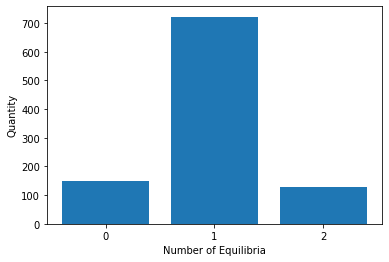

In [58]:
plt.bar(["0", "1", "2"], [150, 722, 128])

plt.xlabel("Number of Equilibria")
plt.ylabel("Quantity")
plt.show()

In [31]:
new

[p1_p2_dist    0.021901
 p1_p3_dist    0.443700
 p2_p3_dist    0.436485
 p1_acc        0.832775
 p2_acc        0.671416
 p3_acc        0.531879
 p1_target     3.000000
 p2_target     1.000000
 p3_target     2.000000
 p1_survive    0.032000
 p2_survive    0.401000
 p3_survive    0.110000
 Name: 4213, dtype: float64,
 p1_p2_dist    0.039336
 p1_p3_dist    0.799133
 p2_p3_dist    0.760904
 p1_acc        0.491423
 p2_acc        0.280181
 p3_acc        0.134676
 p1_target     2.000000
 p2_target     1.000000
 p3_target     1.000000
 p1_survive    0.409000
 p2_survive    0.151000
 p3_survive    0.842000
 Name: 6960, dtype: float64,
 p1_p2_dist    0.046637
 p1_p3_dist    0.234732
 p2_p3_dist    0.191840
 p1_acc        0.052353
 p2_acc        0.024346
 p3_acc        0.013678
 p1_target     2.000000
 p2_target     1.000000
 p3_target     2.000000
 p1_survive    0.716000
 p2_survive    0.251000
 p3_survive    0.940000
 Name: 5809, dtype: float64,
 p1_p2_dist    0.050039
 p1_p3_dist    0.063812
 

In [32]:
len(new)

978

In [15]:
final = pd.concat(new, axis=1).T

In [129]:
final[final["p1_p2_dist"] < final["p1_p3_dist"]]

,p1_p2_dist,p1_p3_dist,p2_p3_dist,p1_acc,p2_acc,p3_acc,p1_target,p2_target,p3_target,p1_survive,p2_survive,p3_survive
2908,0.442348,0.550732,0.109143,0.676996,0.670505,0.604477,3.0,1.0,1.0,0.175,0.898,0.439
2909,0.442348,0.550732,0.109143,0.676996,0.670505,0.604477,3.0,1.0,2.0,0.372,0.774,0.335
1234,0.462037,0.564889,0.109621,0.983241,0.937285,0.708011,2.0,3.0,1.0,0.295,0.302,0.645
1236,0.462037,0.564889,0.109621,0.983241,0.937285,0.708011,3.0,1.0,1.0,0.121,0.854,0.294
1237,0.462037,0.564889,0.109621,0.983241,0.937285,0.708011,3.0,1.0,2.0,0.271,0.681,0.236
2861,0.630729,0.778371,0.292995,0.993930,0.959640,0.762987,3.0,1.0,2.0,0.183,0.593,0.132
3082,0.642766,0.796545,0.200479,0.975781,0.925335,0.756497,2.0,3.0,1.0,0.158,0.224,0.585
3084,0.642766,0.796545,0.200479,0.975781,0.925335,0.756497,3.0,1.0,1.0,0.066,0.883,0.159
3085,0.642766,0.796545,0.200479,0.975781,0.925335,0.756497,3.0,1.0,2.0,0.157,0.617,0.140
2876,0.687442,0.723934,0.235206,0.449362,0.380248,0.335203,3.0,1.0,1.0,0.223,0.858,0.435


In [9]:
p1 = equilibria["p1_survive"].idxmax()
p1 = p1.rename("best_row")
p2 = equilibria["p2_survive"].idxmax()
p2 = p2.rename("best_row")
p3 = equilibria["p3_survive"].idxmax()
p3 = p3.rename("best_row")

In [10]:
print(p1)

p1_p2_dist  p1_p3_dist  p2_p3_dist  p1_acc    p2_acc    p3_acc  
0.018937    0.162379    0.143462    0.519741  0.353610  0.121470      43
0.022998    0.351561    0.342962    0.787060  0.741075  0.305841    1499
0.027225    0.246177    0.225832    0.996931  0.790407  0.557758    2475
0.028107    0.330523    0.332541    0.905358  0.905182  0.508952    1811
0.031700    0.388124    0.419172    0.728720  0.650869  0.297581    2099
                                                                    ... 
0.558763    0.423564    0.248868    0.817281  0.718262  0.219615    3723
0.568841    0.283616    0.417785    0.794518  0.489508  0.042661     563
0.582339    0.418234    0.441327    0.907019  0.793020  0.034184    3699
0.585237    0.405004    0.180770    0.917245  0.647201  0.320773     683
0.602957    0.059180    0.555220    0.361921  0.358141  0.020937    2003
Name: best_row, Length: 500, dtype: int64


In [11]:
print(p2)

p1_p2_dist  p1_p3_dist  p2_p3_dist  p1_acc    p2_acc    p3_acc  
0.018937    0.162379    0.143462    0.519741  0.353610  0.121470      44
0.022998    0.351561    0.342962    0.787060  0.741075  0.305841    1500
0.027225    0.246177    0.225832    0.996931  0.790407  0.557758    2476
0.028107    0.330523    0.332541    0.905358  0.905182  0.508952    1812
0.031700    0.388124    0.419172    0.728720  0.650869  0.297581    2100
                                                                    ... 
0.558763    0.423564    0.248868    0.817281  0.718262  0.219615    3724
0.568841    0.283616    0.417785    0.794518  0.489508  0.042661     564
0.582339    0.418234    0.441327    0.907019  0.793020  0.034184    3700
0.585237    0.405004    0.180770    0.917245  0.647201  0.320773     684
0.602957    0.059180    0.555220    0.361921  0.358141  0.020937    2004
Name: best_row, Length: 500, dtype: int64


In [12]:
pd.merge(p1, p2, how='inner', on='best_row')

,best_row
